In [1]:
# Importing Packages

import json
import csv
import matplotlib.pyplot as plt
import pandas as pd
import jsonlines
import warnings
pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")

The 2 main json files that I will be importing and analyzing for my Capstone Project are the `yelp_academic_dataset_business.json` and `yelp_academic_dataset_review.json` files.

In [2]:
data_path = "../../../yelp_dataset/"

### Business File

In [3]:
# Importing Yelp Business JSON File

# Create an empty list to store the JSON data
business_list = []

# Read the JSON file using jsonlines
with jsonlines.open(data_path + "yelp_academic_dataset_business.json") as reader:
    for obj in reader:
        business_list.append(obj)
        
# Convert the list of JSON objects to a pandas DataFrame
business_df = pd.DataFrame(business_list)        

# Length of rows of Data
print(business_df.shape)

# Display the first few rows of the DataFrame
business_df.head()

(150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
# Drop the columns that are not required
business_df = business_df.drop(['attributes', 'hours'], axis=1)

# Filtering only for businesses that are still open, open = 1, closed = 0
business_df = business_df[business_df['is_open']==1]

### Deciding which City to Focus on

In [5]:
# Top Cities that have the most number of Businesses in this dataset
top_cities = business_df['city'].value_counts().head(10)
top_cities

city
Philadelphia     10542
Tucson            7533
Tampa             7219
Indianapolis      5894
Nashville         5398
Reno              4762
New Orleans       4649
Edmonton          3916
Saint Louis       3403
Santa Barbara     3020
Name: count, dtype: int64

Philadelphia has the most number of Businesses in this dataset

In [6]:
# Filtering Philadelphia
business_df = business_df[business_df.city.isin(['Philadelphia'])]
print(business_df.shape)
business_df.sample(5)

(10542, 12)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
113679,erbA3m2FNa6BKMlW0a8P_w,Xinying Chinese Restaurant,2403 E Somerset St,Philadelphia,PA,19134,39.983144,-75.114942,4.0,51,1,"Restaurants, Chinese"
68913,trwHwsXOVV-ZmF-MtP98BA,High Street Philadelphia,101 S 9th St,Philadelphia,PA,19107,39.949579,-75.155383,4.0,807,1,"Cafes, Pizza, American (New), Breakfast & Brun..."
5373,pEa6tpYyl2NDOPfY1OfFyQ,Milk + Honey Studio,1600 Frankford Ave,Philadelphia,PA,19125,39.974225,-75.133525,5.0,22,1,"Hair Salons, Eyebrow Services, Hair Extensions..."
33986,9AE75wIWF9XiV23NBpHyVA,Corfu Pizza,6730 Old York Rd,Philadelphia,PA,19126,40.056005,-75.140606,3.0,21,1,"Restaurants, Pizza, Burgers, Wraps"
97168,iAYSuGMrd-w6k3wWTYtO0g,Vino Volo,8000 Essington Ave,Philadelphia,PA,19153,39.876110,-75.243033,3.0,29,1,"Wine Bars, Nightlife, Bars"


### Deciding which Business to Focus on

In [7]:
# Overview of Business Categories
business_categories = business_df.assign(categories = business_df.categories.str.split(', ')).explode('categories')
print(str('The number of unique business categories is:'), len(business_categories))

# Most Common Business Categories
business_categories.categories.value_counts().head(20)

The number of unique business categories is: 46794


categories
Restaurants                  3525
Food                         2032
Shopping                     1537
Beauty & Spas                1083
Home Services                1029
Health & Medical              899
Nightlife                     896
Local Services                891
Bars                          793
Event Planning & Services     637
Automotive                    592
Coffee & Tea                  580
Sandwiches                    578
Pizza                         529
Active Life                   496
Arts & Entertainment          438
American (Traditional)        432
Hair Salons                   426
Breakfast & Brunch            415
American (New)                372
Name: count, dtype: int64

In this project, our attention is solely on Restaurant businesses as it is the most popular business found on yelp. Therefore, we will limit the types of businesses included in our refined dataset. Referring to the count plot mentioned earlier, we will narrow down the categories to the following specific one: Restaurants.

In [8]:
# Filter rows where 'Restaurants' is in the 'categories' column
restaurants_df = business_df[business_df['categories'].str.contains('Restaurants', na=False)]
print(restaurants_df.shape)
restaurants_df.sample(5)

(3525, 12)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
53802,8yGZhBwFFLtOVLY9Do8ohQ,Renata's Kitchen,3940 Baltimore Ave,Philadelphia,PA,19104,39.949660,-75.202667,4.0,203,1,"Breakfast & Brunch, Caterers, Tapas/Small Plat..."
125545,NMrjPhdqWBn1vRvaNg5GRg,Overbrook Pizza Shop,2099 N 63rd St,Philadelphia,PA,19151,39.988404,-75.249319,4.0,83,1,"Pizza, Restaurants"
130032,1vPSY4EA-fTRIZYz1Ruzow,K'Far Cafe,110 S 19th St,Philadelphia,PA,19103,39.951593,-75.172171,4.5,356,1,"Bakeries, American (Traditional), Mediterranea..."
12217,aVRVBncwdK3GrqLKLFPKAg,Paradise Pizzeria,1363 E Lycoming St,Philadelphia,PA,19124,40.009122,-75.100471,1.0,5,1,"Restaurants, Pizza"
66152,KPyHQaKR7G0tuVedn4y9Dw,New Pizza Villa,7159 Torresdale Ave,Philadelphia,PA,19135,40.029072,-75.036780,3.5,22,1,"Restaurants, Pizza"


### Review File

In [9]:
# Importing Yelp Review JSON File

# Create an empty list to store the JSON data
reviews_list = []

# Read the JSON file using jsonlines
with jsonlines.open(data_path + "yelp_academic_dataset_review.json") as reader:
    for obj in reader:
        reviews_list.append(obj)
        
# Convert the list of JSON objects to a pandas DataFrame
reviews_df = pd.DataFrame(reviews_list)        

# Length of rows of Data
print(reviews_df.shape)

# Display the first few rows of the DataFrame
reviews_df.head()

(6990280, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [10]:
# Drop the columns that are not required
reviews_df = reviews_df.drop(['useful','funny','cool'], axis=1)

print(reviews_df.shape)

(6990280, 6)


### Filter reviews from businesses in Philly

In [11]:
# Keeping only the reviews for the businesses in Philadelphia
philly_reviews_df = reviews_df.merge(restaurants_df[['business_id']], on='business_id', how='inner')
print(philly_reviews_df.shape)

(511138, 6)


In [12]:
def extract_date_components(date_str):
    date_part, time_part = date_str.split(' ')
    year, month, _ = date_part.split('-')
    return year, month, time_part

# Extracting year, month, and time components and assigning them to new columns
philly_reviews_df['year'], philly_reviews_df['month'], philly_reviews_df['time'] = zip(*philly_reviews_df.date.apply(extract_date_components))

# Length of rows of Data
print(philly_reviews_df.shape)

# Display the first few rows of the DataFrame
philly_reviews_df.head()

(511138, 9)


,review_id,user_id,business_id,stars,text,date,year,month,time
0,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,01,00:01:03
1,HME_ksGph3se7Aze5hxa-Q,kSMOJwJXuEUqzfmuFncK4A,kxX2SOes4o-D3ZQBkiMRfA,2.0,Dine-in gets 2 stars. Disappointing service & ...,2014-07-13 17:25:47,2014,07,17:25:47
2,EJWyA5wpdVMji1j4TwSZqQ,mqBWACmaHflW4eh_Ofp16Q,kxX2SOes4o-D3ZQBkiMRfA,5.0,After a long hiatus from reviewing I have awak...,2010-08-20 19:16:04,2010,08,19:16:04
3,T_kAb2NeylB-JdNDKphryw,Z-xgVb4nM42943m2wbBkFw,kxX2SOes4o-D3ZQBkiMRfA,5.0,We've eaten here 3 times and it seems that eac...,2017-01-02 14:25:26,2017,01,14:25:26
4,NENaCqb6TNj5CyY1LOdI6Q,2SEoXb6r6hPKrl9V9VzBgA,kxX2SOes4o-D3ZQBkiMRfA,5.0,Came to Philly for a family event but stayed a...,2015-07-28 17:15:20,2015,07,17:15:20


In [13]:
# Number of Unique Users in this Reviews Dataset
n_users = len(philly_reviews_df.user_id.unique())
n_users

178325

In [14]:
# Get the maximum value of the "date" column
max_date = philly_reviews_df['date'].max()

# Display the maximum date
print(max_date)

2022-01-19 19:46:34


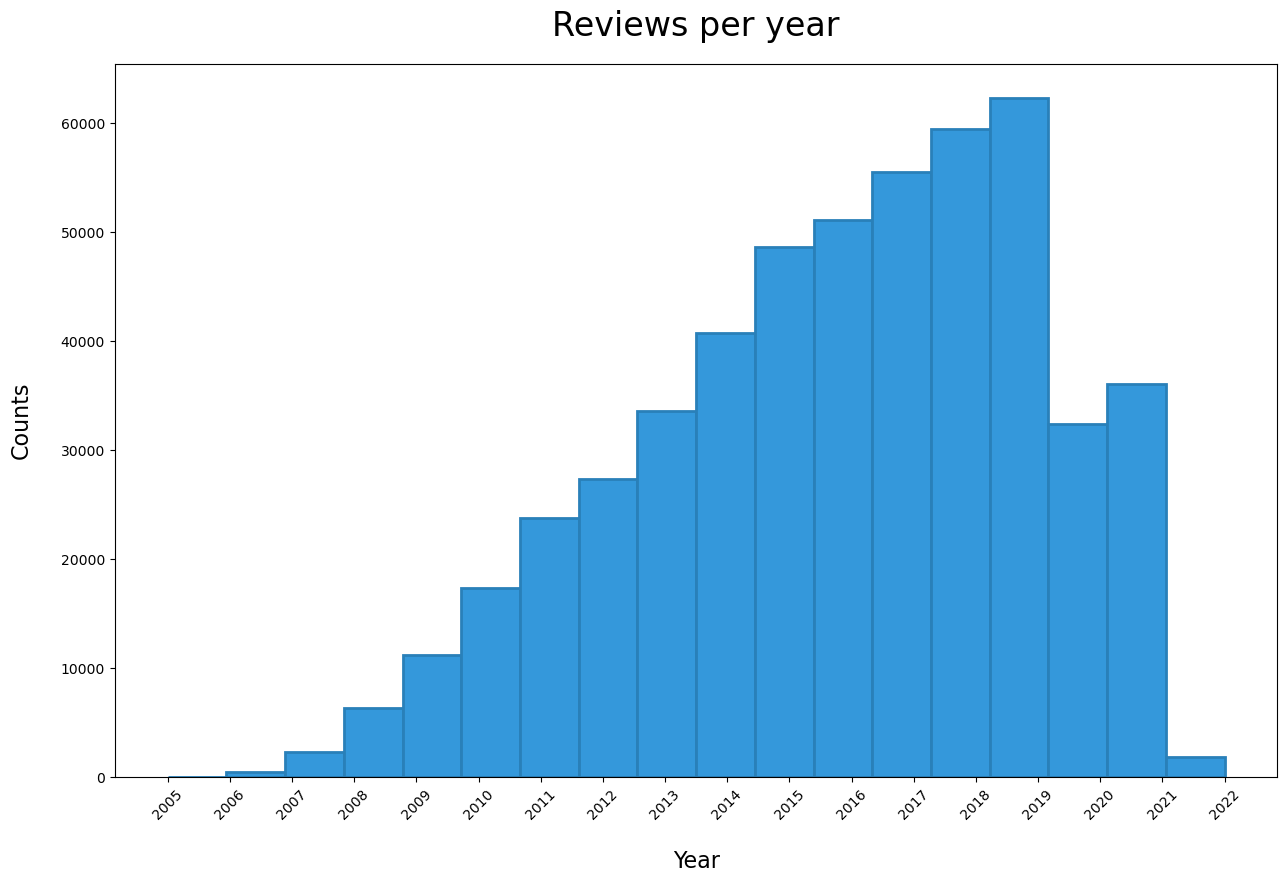

In [15]:
# Histogram plot of Business Reviews per Year
reviews_sorted = philly_reviews_df.sort_values(by='year', ascending=True)

def make_histogram(dataset, attribute, bins=18, bar_color='#3498db', edge_color='#2980b9', title='Title', x='X', y='Y', sort_index=False):
    fig, ax = plt.subplots(figsize=(15, 15/1.6180))
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(x, fontsize=16, labelpad=20)
    ax.set_ylabel(y, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2) 
    plt.xticks(rotation=45)

    
make_histogram(reviews_sorted, 'year', title='Reviews per year', x='Year', y='Counts')

The histogram has a left-skewed distribution with a drop in reviews in 2020 (due to COVID-19). I will only be analyzing reviews from **2015 to 2021** for the sake of this capstone project.

In [16]:
# Filtering for Reviews from 2015-2021
philly_reviews_df = philly_reviews_df[(philly_reviews_df['year'].astype(int) >= 2015) & (philly_reviews_df['year'].astype(int) <= 2021)]

# Overview of our Final Reviews Dataset
print(philly_reviews_df.shape)


(345849, 9)


### We are now left with 345,849 rows of Yelp User Reviews Data for our 3,525 Restaurant Businesses in Philadelphia.

In [17]:
# Checking for Null Values
philly_reviews_df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
text           0
date           0
year           0
month          0
time           0
dtype: int64

In [18]:
# Save cleaned business dataframe into csv file
restaurants_df.to_csv(data_path + "restaurants_dataset.csv")

# Save cleaned reviews dataframe into csv file
philly_reviews_df.to_csv(data_path + "reviews_dataset.csv")